Super Store Dataset Analysis:

Setting up the necessary files and tools

In [2]:
#importing necessary libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#loading the csv file
df=pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Data Cleaning:

Let us start analysing by removing the unnecessary columns

In [4]:
#removing unnecessary columns
df.drop(columns=['Ship Mode','Postal Code'])

,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [5]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
df.drop(columns=['Ship Mode','Postal Code'],inplace=True)

In [7]:
df.tail()

,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Consumer,United States,Westminster,California,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


Obtaining details about the current dataset

In [8]:
for column in df.columns:
    print(df[column].unique())

['Consumer' 'Corporate' 'Home Office']
['United States']
['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morristown' 'Cincinnati' 'Inglewood' 'Tamarac' 'Colorado Springs'
 'Belleville' 'Taylor' 'Lakewo

We can see that there are alot of cities and states involved which makes the analysis difficult. Let us look at the unique values for all the columns except City and State

In [9]:
for column in df.columns:
    if column != 'City' and column != 'State':
        print(column,":",df[column].unique())

Segment : ['Consumer' 'Corporate' 'Home Office']
Country : ['United States']
Region : ['South' 'West' 'Central' 'East']
Category : ['Furniture' 'Office Supplies' 'Technology']
Sub-Category : ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
Sales : [261.96  731.94   14.62  ... 437.472  97.98  243.16 ]
Quantity : [ 2  3  5  7  4  6  9  1  8 14 11 13 10 12]
Discount : [0.   0.45 0.2  0.8  0.3  0.5  0.7  0.6  0.32 0.1  0.4  0.15]
Profit : [ 41.9136 219.582    6.8714 ...  16.124    4.1028  72.948 ]


To see more in detail about the dataset

In [10]:
#To get statistical description of the data:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [11]:
#To obtain information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Segment       9994 non-null   object 
 1   Country       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


Now let us start visualising relationships between columns

<Axes: xlabel='Region'>

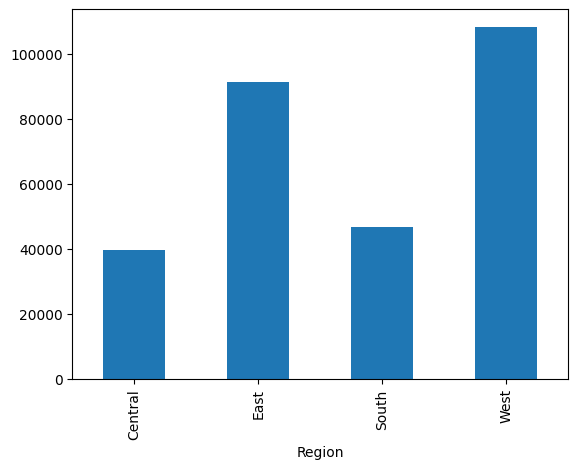

In [12]:
#To find regions where profit was high
df.groupby("Region")["Profit"].sum().plot.bar()

We saw the relationship between Regions and Profit and found that East and West regions give high Profit. 

Now let us see the relationship between the States and Profit amount.

<Axes: xlabel='State'>

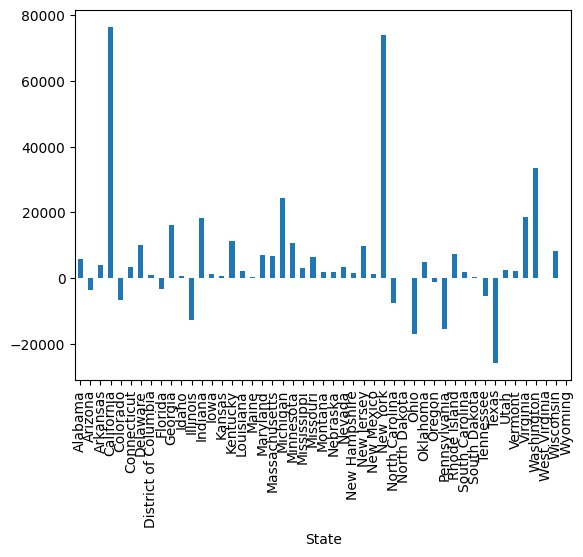

In [13]:
#To find states where profit was high
df.groupby("State")["Profit"].sum().plot.bar()

We could see that Profit was especially high in California, New York and Washington which are all in either the East or the West region.

<Axes: xlabel='Sub-Category'>

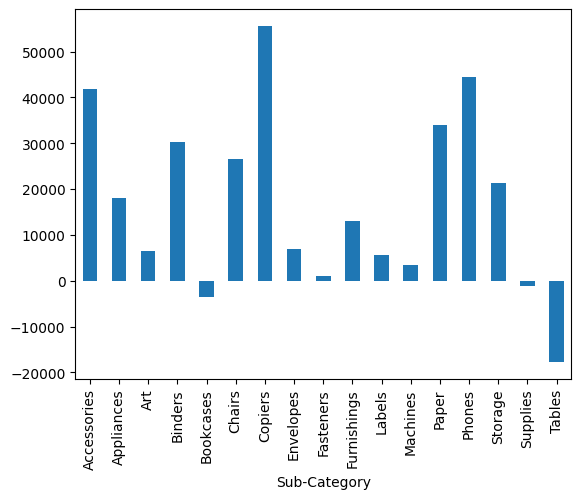

In [14]:
#To find Sub-Categories where profit was high
df.groupby("Sub-Category")["Profit"].sum().plot.bar()

From the above bar graph we can conclude determine the Sub-Categories and their Profit amounts.

<Axes: ylabel='Sales'>

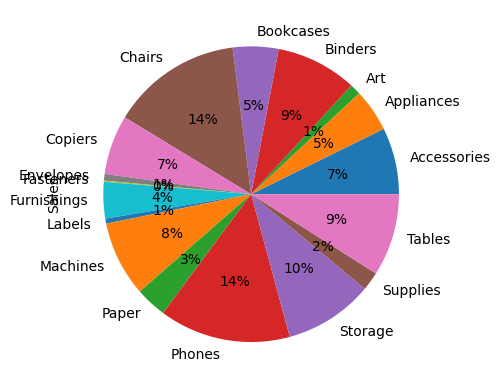

In [15]:
#To find Sub-Categories where Sales was high
df.groupby(["Sub-Category"])["Sales"].sum().plot.pie(autopct='%1.0f%%')

The above pie-chart lets us know that Sales was high in these Sub-Categories:
Chairs,Binders,Tables,Storage and Phones, with Phones and Chairs being among the highest.

From the above two plots, we can conclude that if we increase sales in Phones, Binders and Copiers, we can get high Profit in return.

In [16]:
#Let us try to find more conditions where Profit is high
df.loc[(df['Profit'] > 200)]

,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
1,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.940,3,0.0,219.5820
24,Consumer,United States,Orem,Utah,West,Furniture,Tables,1044.630,3,0.0,240.2649
54,Corporate,United States,New York City,New York,East,Technology,Phones,1029.950,5,0.0,298.6855
144,Consumer,United States,Independence,Missouri,Central,Office Supplies,Appliances,839.430,3,0.0,218.2518
149,Corporate,United States,Franklin,Wisconsin,Central,Furniture,Chairs,1951.840,8,0.0,585.5520
...,...,...,...,...,...,...,...,...,...,...,...
9925,Corporate,United States,New York City,New York,East,Office Supplies,Binders,1087.936,8,0.2,353.5792
9929,Consumer,United States,San Francisco,California,West,Technology,Copiers,2799.960,5,0.2,944.9865
9947,Corporate,United States,Indianapolis,Indiana,Central,Furniture,Chairs,1925.880,6,0.0,539.2464
9948,Corporate,United States,Indianapolis,Indiana,Central,Office Supplies,Appliances,2405.200,8,0.0,793.7160


We can observe that most of the values above 200 can be found in sales where the discount is 0.0 and that means there is minimal loss for the company.


Let us try to find regions where Discount is the least.

<Axes: ylabel='Discount'>

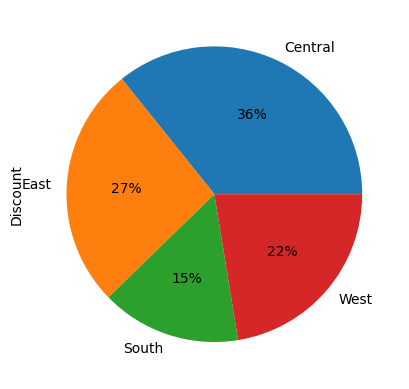

In [17]:
#To find Regions where Discount was least
df.groupby("Region")["Discount"].sum().plot.pie(autopct='%1.0f%%')

From this we can see that South is the least. But South Region has lesser sales and profit compared to East and West.
West has the second least Discount sum followed by the East.

In [19]:
#Let us try to find where New York, California and Washington are
df.loc[(df['State'] == 'New York')]


,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
53,Corporate,United States,New York City,New York,East,Office Supplies,Fasteners,15.26,7,0.0,6.2566
54,Corporate,United States,New York City,New York,East,Technology,Phones,1029.95,5,0.0,298.6855
55,Consumer,United States,Troy,New York,East,Office Supplies,Storage,208.56,6,0.0,52.1400
56,Consumer,United States,Troy,New York,East,Office Supplies,Paper,32.40,5,0.0,15.5520
57,Consumer,United States,Troy,New York,East,Furniture,Chairs,319.41,5,0.1,7.0980
...,...,...,...,...,...,...,...,...,...,...,...
9956,Home Office,United States,New Rochelle,New York,East,Office Supplies,Paper,46.35,5,0.0,21.7845
9957,Home Office,United States,New Rochelle,New York,East,Office Supplies,Paper,223.92,4,0.0,109.7208
9958,Home Office,United States,New Rochelle,New York,East,Office Supplies,Supplies,7.30,2,0.0,2.1900
9984,Consumer,United States,Long Beach,New York,East,Office Supplies,Labels,31.50,10,0.0,15.1200


In [20]:
df.loc[(df['State'] == 'California')]

,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.620,2,0.0,6.8714
5,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,48.860,7,0.0,14.1694
6,Consumer,United States,Los Angeles,California,West,Office Supplies,Art,7.280,4,0.0,1.9656
7,Consumer,United States,Los Angeles,California,West,Technology,Phones,907.152,6,0.2,90.7152
8,Consumer,United States,Los Angeles,California,West,Office Supplies,Binders,18.504,3,0.2,5.7825
...,...,...,...,...,...,...,...,...,...,...,...
9986,Consumer,United States,Los Angeles,California,West,Technology,Accessories,36.240,1,0.0,15.2208
9990,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.600,4,0.0,13.3200


In [21]:
df.loc[(df['State'] == 'Washington')]

,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
13,Consumer,United States,Seattle,Washington,West,Office Supplies,Binders,407.976,3,0.2,132.5922
117,Consumer,United States,Seattle,Washington,West,Furniture,Tables,787.530,3,0.0,165.3813
156,Home Office,United States,Seattle,Washington,West,Office Supplies,Art,6.630,3,0.0,1.7901
157,Consumer,United States,Seattle,Washington,West,Furniture,Chairs,457.568,2,0.2,51.4764
163,Consumer,United States,Seattle,Washington,West,Office Supplies,Binders,27.680,2,0.2,9.6880
...,...,...,...,...,...,...,...,...,...,...,...
9761,Corporate,United States,Seattle,Washington,West,Technology,Accessories,239.970,3,0.0,86.3892
9762,Corporate,United States,Seattle,Washington,West,Office Supplies,Appliances,81.960,2,0.0,22.9488
9763,Corporate,United States,Seattle,Washington,West,Office Supplies,Supplies,238.620,2,0.0,4.7724
9857,Corporate,United States,Seattle,Washington,West,Furniture,Tables,3393.680,8,0.0,610.8624


Therefore we can see that New York is in the East whereas Washington and California are in the West.

Thus we can conclude that to gain Maximum profit, the company should increase sales of Phones, Binders and Copiers while offering no Discount, in the East and West regions, especially in the West states of California and Washington followed by the East state of New York.